In [1]:
# Common imports
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import numpy as np
import pandas as pd
import os
%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
FOLDER = "figures"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, FOLDER)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Import Data

Begin by importing the data from the file called `MultipleLinearRegression.csv`.

In [2]:
import pandas as pd

fileName = "MultipleLinearRegression.csv"
PrelimData = pd.read_csv(fileName)

# Create First Image 

Use the [scatter3D](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) to plot in three dimensions.  Create four [subplots](https://matplotlib.org/3.1.0/gallery/recipes/create_subplots.html) with the appropriate viewing angles using the [view_init()](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html) function.

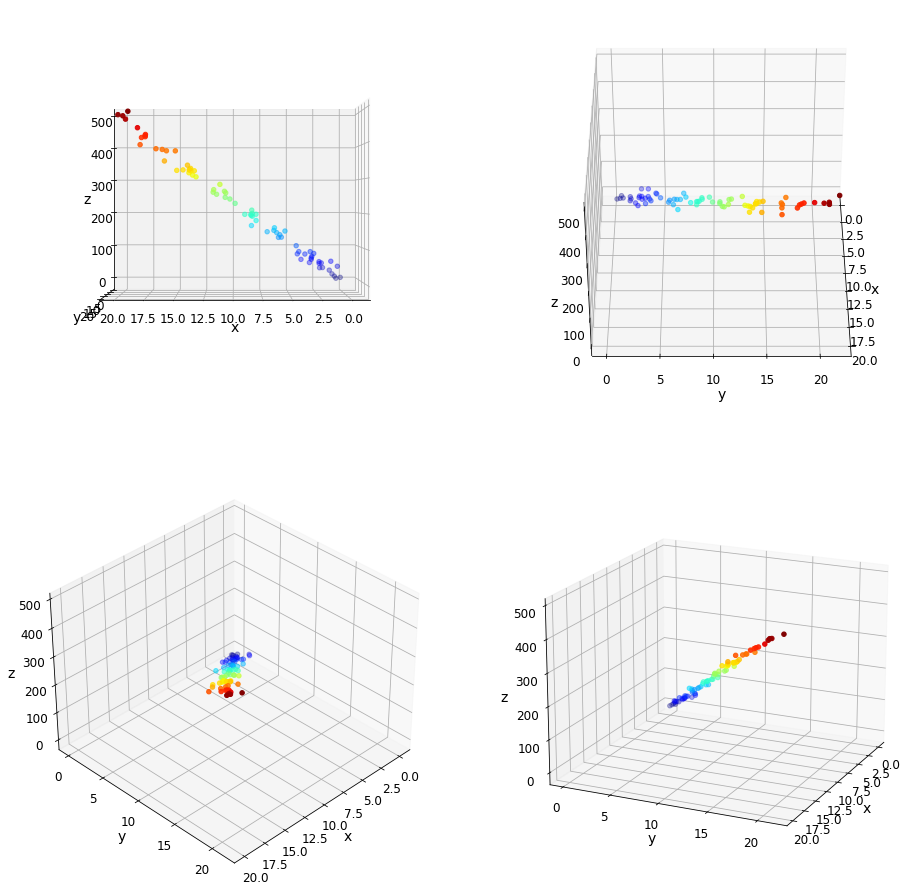

In [3]:
from mpl_toolkits import mplot3d

#assign data to axis
xaxis = PrelimData["x"]
yaxis = PrelimData["y"]
zaxis = PrelimData["z"]

#create plots
ImageOne = plt.figure(figsize=(16, 16))

#plot one
POne = ImageOne.add_subplot(2, 2, 1, projection='3d')
POne.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
POne.view_init(0, 90)
POne.set_xlabel('x')
POne.set_ylabel('y')
POne.set_zlabel('z')

#plot two
PTwo = ImageOne.add_subplot(2, 2, 2, projection='3d')
PTwo.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
PTwo.view_init(38, 0)
PTwo.set_xlabel('x')
PTwo.set_ylabel('y')
PTwo.set_zlabel('z')

#plot three
PThree = ImageOne.add_subplot(2, 2, 3, projection='3d')
PThree.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
PThree.view_init(35, 45)
PThree.set_xlabel('x')
PThree.set_ylabel('y')
PThree.set_zlabel('z')

#plot four
PFour = ImageOne.add_subplot(2, 2, 4, projection='3d')
PFour.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
PFour.view_init(18, 25)
PFour.set_xlabel('x')
PFour.set_ylabel('y')
PFour.set_zlabel('z')

#plot figures
plt.show()

# Train Linear Regression Model

From the `sklearn.linear_model` library, import the `LinearRegression` class.  Instantiate an object of this class called `model`, and fit it to the data. The `x` and `y` coordinates will be your features and `z` will be your response. 

Print the optimal model parameters to the screen by completing the following `print()` statements.

**Note:** Since we are not concerned with generalization error in this assignment, we will not split our data into training and test sets. In 'real-world' projects, you would want to split your data to see how your model performs with data that it has never seen before.

In [4]:
from sklearn.linear_model import LinearRegression

LinReg = PrelimData.drop(['z'], axis = 1);
var1 = PrelimData[['z']]
model = LinearRegression()
model.fit(LinReg,var1)

print("Model Coefficients: ", model.coef_)
print("Model Intercept : ", model.intercept_)

Model Coefficients:  [[ 8.02602396 15.95639323]]
Model Intercept :  [-8.63287678]


# Create Second Image

Now that we have fit our model, which means that we have computed the optimal model parameters, we can use our model to plot the regression line for the data.  Below, I supply you with `x_fit` and `y_fit` that represent the x- and y-data of the regression line, respectively.  All we need to do next is ask the model to predict a `z_fit` value for each `x_fit` and `y_fit` pair by invoking the model's `predict()` method.  This should make sense when you consider the ordinary least squares linear regression equation for calculating `z_fit`:

$$ z_{fit} = \hat{\theta}_0 + \hat{\theta}_1 x_{fit} + \hat{\theta}_2 y_{fit} $$

where $ \hat{\theta}_i $ are the computed model parameters.  You must use `x_fit` and `y_fit` as features to be passed together as a DataFrame to the model's `predict()` method, which will return `z_fit` as determined by the above equation.  Once you obtain `z_fit`, you are ready to plot the regression line by plotting it against `x_fit` and `y_fit`.

In [5]:
# Plot Curve Fit
x_fit = np.linspace(0,21,1000)
y_fit = x_fit
xyvar = pd.DataFrame({'x_fit': x_fit, 'y_fit': y_fit})
z_fit = model.predict(xyvar)
x_fit = pd.DataFrame(x_fit, columns = ['x'])
y_fit = pd.DataFrame(y_fit, columns = ['y'])
z_fit = pd.DataFrame(z_fit, columns = ['z'])

Recreate the first image, but plot the line of best fit in each of the subplots as well.

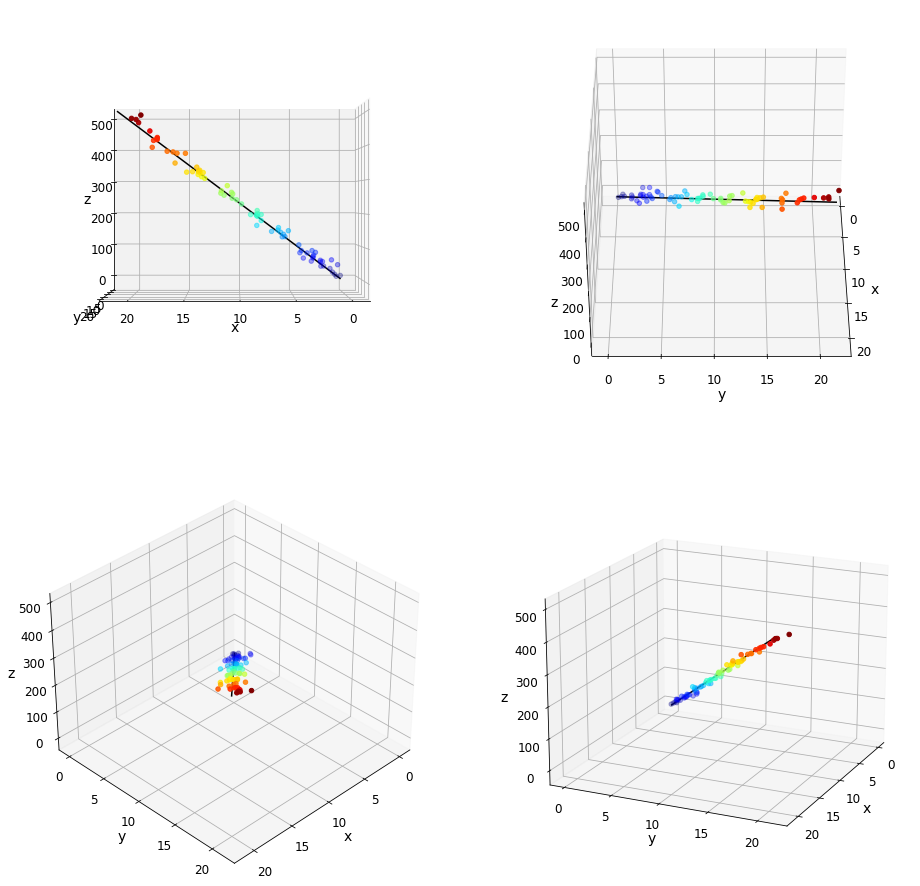

In [6]:
#assign data to axis
xaxis = PrelimData["x"]
yaxis = PrelimData["y"]
zaxis = PrelimData["z"]

#create best fit lines
xbestfit = x_fit['x']
ybestfit = y_fit['y']
zbestfit = z_fit['z']

#create plots
ImageOne = plt.figure(figsize=(16, 16))

#plot one
POne = ImageOne.add_subplot(2, 2, 1, projection='3d')
POne.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
POne.plot3D(xbestfit, ybestfit, zbestfit, color='black')
POne.view_init(0, 90)
POne.set_xlabel('x')
POne.set_ylabel('y')
POne.set_zlabel('z')

#plot two
PTwo = ImageOne.add_subplot(2, 2, 2, projection='3d')
PTwo.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
PTwo.plot3D(xbestfit, ybestfit, zbestfit, color='black')
PTwo.view_init(38, 0)
PTwo.set_xlabel('x')
PTwo.set_ylabel('y')
PTwo.set_zlabel('z')

#plot three
PThree = ImageOne.add_subplot(2, 2, 3, projection='3d')
PThree.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
PThree.plot3D(xbestfit, ybestfit, zbestfit, color='black')
PThree.view_init(35, 45)
PThree.set_xlabel('x')
PThree.set_ylabel('y')
PThree.set_zlabel('z')

#plot four
PFour = ImageOne.add_subplot(2, 2, 4, projection='3d')
PFour.scatter3D(xaxis, yaxis, zaxis, c=zaxis, cmap='jet')
PFour.plot3D(xbestfit, ybestfit, zbestfit, color='black')
PFour.view_init(18, 25)
PFour.set_xlabel('x')
PFour.set_ylabel('y')
PFour.set_zlabel('z')

#plot figures
plt.show()

# Infer the True Model Parameters

I defined the equation of a line plus a random Gaussian noise term in order to generate this data - this is the "true" model (minus the noise term). You took that noisy data and performed a regression analysis to obtain estimates of the "true" model parameters. The noise in the data prevents you from computing those "true" model parameters exactly - there is some irreducible error. Instead, the linear regression model only gives you the Best Linear Unbiased Estimators (BLUE) for the "true" model parameters. 

The true model parameters that I selected are <b>integer values</b>. Given this information, you are able to infer the true model parameters by rounding the coefficients and the intercept to the nearest integer value. You may "hard-code" these values into the below print statements.

In [7]:
finalvar1 = model.coef_.astype(int)
finalvar2 = model.intercept_.astype(int)
print("True Model Coefficients: ", finalvar1)
print("True Model Intercept : ", finalvar2)

True Model Coefficients:  [[ 8 15]]
True Model Intercept :  [-8]
